In [6]:

# Adding support for large, multi-dimensional arrays and matrices.
import numpy as np
import pandas as pd

import sys
import matplotlib.pyplot as plt



In [5]:
#load in data
place_holder = './'
subscriptions = pd.read_csv('user_subscriptions.csv') 
#visitiation_1 = pd.read_csv('visitationdataPART1.csv') 
#visitiation_2 = pd.read_csv('visitationdataPART2.csv') 


# convert data type
subscriptions['Join Date'] =  pd.to_datetime(subscriptions['Join Date'].str.upper(), format='%b-%y', yearfirst=False)
subscriptions['End Date'] =  pd.to_datetime(subscriptions['End Date'].str.upper(), format='%b-%y', yearfirst=False)

In [47]:
import datetime
import math

#1 --add customer status
subscriptions['status']=np.where(subscriptions['End Date'].isna(),"existing","past")

#2 -- add duration

#add new timestamp
subscriptions['bridge_timestamp']=subscriptions['End Date']
subscriptions['bridge_timestamp']= subscriptions['bridge_timestamp'].fillna(datetime.datetime(2019,1,1))
#calculate duration 
subscriptions['Duration'] = subscriptions['bridge_timestamp']-subscriptions['Join Date']
##convert the difference in month
subscriptions['Duration'] = (subscriptions['Duration'] /  np.timedelta64(1, 'M') ).apply(math.floor)

#year join and left
subscriptions['join_year'] = subscriptions['Join Date'].dt.year
subscriptions['end_year'] = subscriptions['End Date'].dt.year



In [48]:
subscriptions

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,status,bridge_timestamp,Duration,join_year,end_year
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992,past,2011-12-01,0,2011,2011.0
1,Greenwich,2018-06-01,A,Female,Standard,NaT,2,1972,existing,2019-01-01,7,2018,NaN
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985,past,2018-10-01,7,2018,2018.0
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972,past,2015-12-01,2,2015,2015.0
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,past,2015-12-01,7,2015,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850028,Lewisham,2018-12-01,A,Male,Standard,NaT,850029,1995,existing,2019-01-01,1,2018,NaN
850029,Tower Hamlets,2013-10-01,B,Male,Standard,2014-02-01,850030,1987,past,2014-02-01,4,2013,2014.0
850030,Redbridge,2018-05-01,C1,Female,Standard,2018-09-01,850031,1985,past,2018-09-01,4,2018,2018.0
850031,Camden,2017-07-01,B,Female,Standard,2017-09-01,850032,1978,past,2017-09-01,2,2017,2017.0


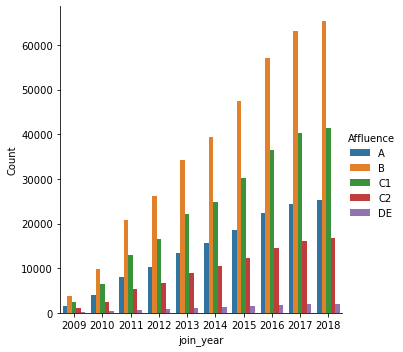

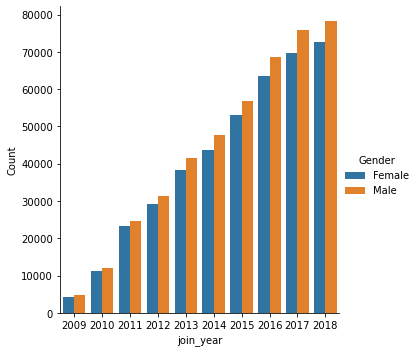

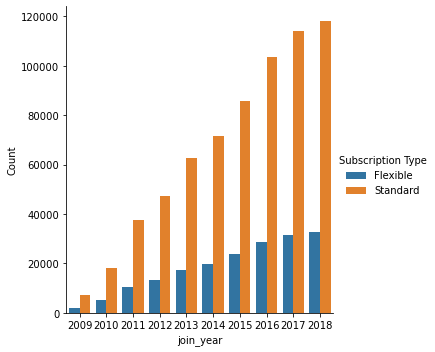

In [63]:
import seaborn as sns

# there is no overall change in trend for members that join in different year

#affluence segment overview
affluence=subscriptions.groupby(['Affluence','join_year']).size().to_frame('Count').reset_index()
sns.catplot(x="join_year", y="Count", hue="Affluence", kind="bar", data=affluence)
plt.show()


#gender segment overview
gender=subscriptions.groupby(['Gender','join_year']).size().to_frame('Count').reset_index()
sns.catplot(x="join_year", y="Count", hue="Gender", kind="bar", data=gender)
plt.show()

#subscription type segment overview
suscription=subscriptions.groupby(['Subscription Type','join_year']).size().to_frame('Count').reset_index()
sns.catplot(x="join_year", y="Count", hue="Subscription Type", kind="bar", data=suscription)
plt.show()




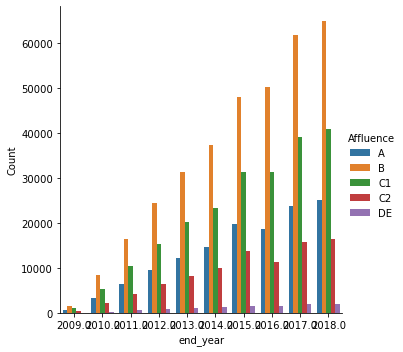

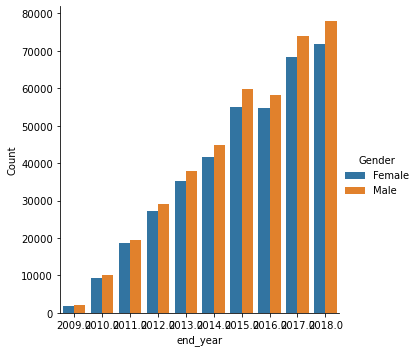

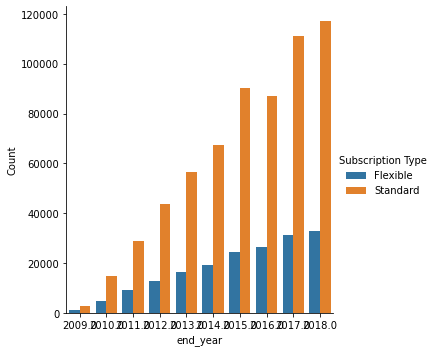

In [65]:
# Interestingly there is a reduction in number of members that left gym in 2016

#affluence segment overview
affluence=subscriptions.groupby(['Affluence','end_year']).size().to_frame('Count').reset_index()
sns.catplot(x="end_year", y="Count", hue="Affluence", kind="bar", data=affluence)
plt.show()


#gender segment overview
gender=subscriptions.groupby(['Gender','end_year']).size().to_frame('Count').reset_index()
sns.catplot(x="end_year", y="Count", hue="Gender", kind="bar", data=gender)
plt.show()

#subscription type segment overview
suscription=subscriptions.groupby(['Subscription Type','end_year']).size().to_frame('Count').reset_index()
sns.catplot(x="end_year", y="Count", hue="Subscription Type", kind="bar", data=suscription)
plt.show()

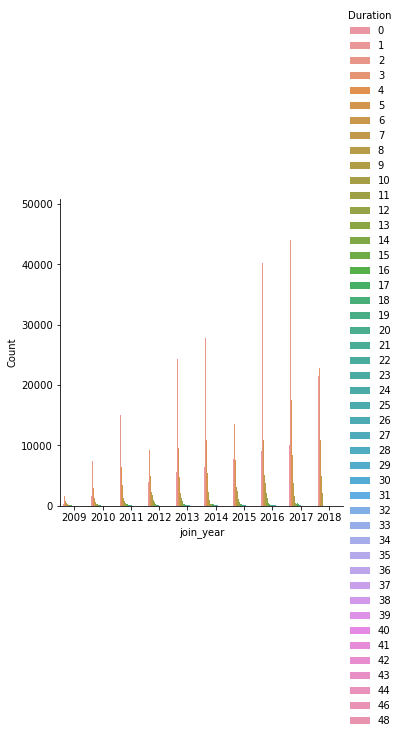

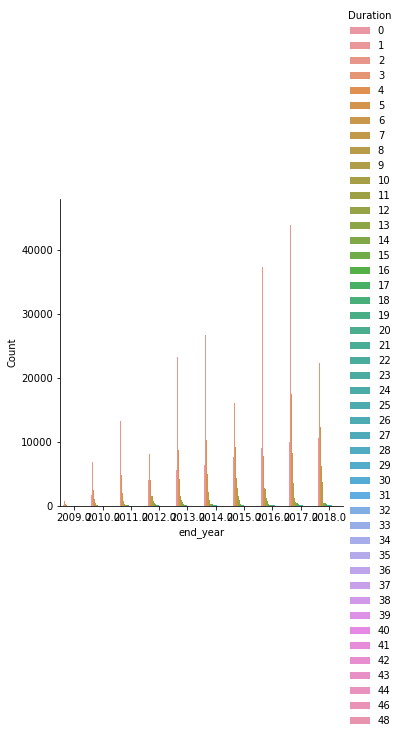

In [73]:
# We can see that for members that join in 2015, the duration of there membership is different compare with other years. In Powerbi i can see a small reduction in duration. 
# Restructure required for this graph structure! - Histogram is welcomed!

# duration of membership for people join in different year
join_duration=subscriptions.groupby(['Duration','join_year']).size().to_frame('Count').reset_index()
sns.catplot(x="join_year", y="Count", hue="Duration", kind="bar", data=join_duration)
plt.show()

# duration of membership for people left in different year
end_duration=subscriptions.groupby(['Duration','end_year']).size().to_frame('Count').reset_index()
sns.catplot(x="end_year", y="Count", hue="Duration", kind="bar", data=end_duration)
plt.show()
